<a href="https://colab.research.google.com/github/MauricioPimenta/ComputerVision/blob/main/2023.09-atividade_movimento_corpo_rigido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considere uma câmera representada pelos eixos coordenados abaixo.
Note que o eixo Z, o qual representa o eixo óptico da câmera está apontado para cima.

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

In [86]:
def set_plot(ax=None,figure = None,lim=[-2,2], limX=None, limY=None, limZ=None):
    if figure ==None:
        figure = plt.figure(figsize=(8,8))
    if ax==None:
        ax = plt.axes(projection='3d')
    if limX is None:
        limX = lim
    if limY is None:
        limY = lim
    if limZ is None:
        limZ = lim


    # Define os eixos com os limites limX, limY e limZ
    ax.set_title("camera reference")
    ax.set_xlim(limX)
    ax.set_xlabel("x axis")
    ax.set_ylim(limY)
    ax.set_ylabel("y axis")
    ax.set_zlim(limZ)
    ax.set_zlabel("z axis")
    return ax

#adding quivers to the plot
def draw_arrows(point,base,axis,length=1.0, colorX='red', colorY='green', colorZ='blue'):
    # The object base is a matrix, where each column represents the vector
    # of one of the axis, written in homogeneous coordinates (ax,ay,az,0)


    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)

    return axis


### Setting printing options
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)



Crie suas funções de translação e rotação nos três eixos.

In [87]:
from math import *

'''
    myRotateZ(obj, angle)

    Rotaciona o objeto 'obj' de um ângulo 'angle' (rad) em torno do
    eixo Z (as coordenadas Z de 'obj' serão as mesmas após aplicada a
    transformação)
'''
def myRotateZ(obj=None, angle=0):

    R = np.array([  [cos(angle),    -sin(angle),    0,      0],
                    [sin(angle),    cos(angle),     0,      0],
                    [   0,              0,          1,      0],
                    [   0,              0,          0,      1] ] )
    #print(R)

    if obj is None:
        return R

    return R @ obj

'''
    myRotateY(obj, angle)

    Rotaciona o objeto 'obj' de um ângulo 'angle' (rad) em torno do
    eixo Y (as coordenadas Y de 'obj' serão as mesmas após aplicada a
    transformação)
'''
def myRotateY(obj=None, angle=0):
    R = np.array([  [cos(angle),        0,      sin(angle),      0],
                    [    0,             1,          0,           0],
                    [-sin(angle),       0,      cos(angle),      0],
                    [   0,              0,          0,           1] ] )
    #print(R)
    if obj is None:
        return R

    return R @ obj

'''
    myRotateX(obj, angle)

    Rotaciona o objeto 'obj' de um ângulo 'angle' (rad) em torno do
    eixo X (as coordenadas x de 'obj' serão as mesmas após aplicada a
    transformação)
'''
def myRotateX(obj=None, angle=0):

    R = np.array([  [   1,              0,              0,            0],
                    [   0,          cos(angle),    -sin(angle),       0],
                    [   0,          sin(angle),    cos(angle),        0],
                    [   0,              0,              0,            1] ] )
    #print(R)
    if obj is None:
        return R

    return R @ obj

'''
    myTrasnlate(obj, dx, dy, dz)

    Realiza a Translação do objeto 'obj' de 'dx', 'dy' e 'dz' recebidos
    como parâmetro.

    Retorna o vetor ou a matriz resultante da multiplicação matricial
    entre a matriz de translação 'T' e o objeto 'obj'.
    Ou seja, retorna: ( T @ obj )
'''
def myTranslate(obj=None, dx=0, dy=0, dz=0):
    T = np.array([  [1, 0,  0,  dx],
                    [0, 1,  0,  dy],
                    [0, 0,  1,  dz],
                    [0, 0,  0,  1 ]     ] )
    if obj is None:
        return T

    return T @ obj


In [88]:
# base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))

print ('Cartesian base: \n',base)
#origin point
point = np.array([[0],[0],[0],[1]])

cam = np.hstack((base,point))

print ('Origin: \n',point)

print ('cam: \n',cam)


Cartesian base: 
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]]
Origin: 
 [[0]
 [0]
 [0]
 [1]]
cam: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


<Axes3D: title={'center': 'camera reference'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

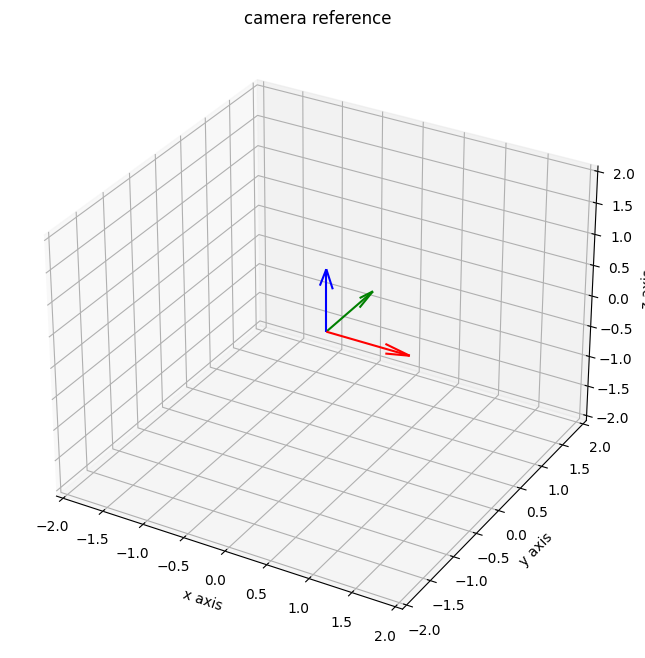

In [89]:
ax0 = set_plot()
draw_arrows(point,base,ax0)

Execute as transformações necessárias para posicionar o eixo óptico da câmera na horizontal (eixo Z), tendo o eixo Y apontando para baixo e o eixo X para a direita (sem alteração da orientação atual). Além disso, posicione essa câmera no ponto (2,7,3).

Faça o seu código abaixo.

In [90]:
# Variaveis pra transformacao
angCam = -pi/2
dxCam = 2
dyCam = 7
dzCam = 3

# Faça as transformações
cam2 = myRotateX(cam, angCam)
cam2 = myTranslate(cam2, dxCam,dyCam,dzCam)
# Imprima o valor da camera original e camera transformada

print(cam); print(); print(cam2)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

[[ 1.  0.  0.  2.]
 [ 0.  0.  1.  7.]
 [ 0. -1.  0.  3.]
 [ 0.  0.  0.  1.]]


Vamos agora plotar o seu resultado.

<Axes3D: title={'center': 'camera reference'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

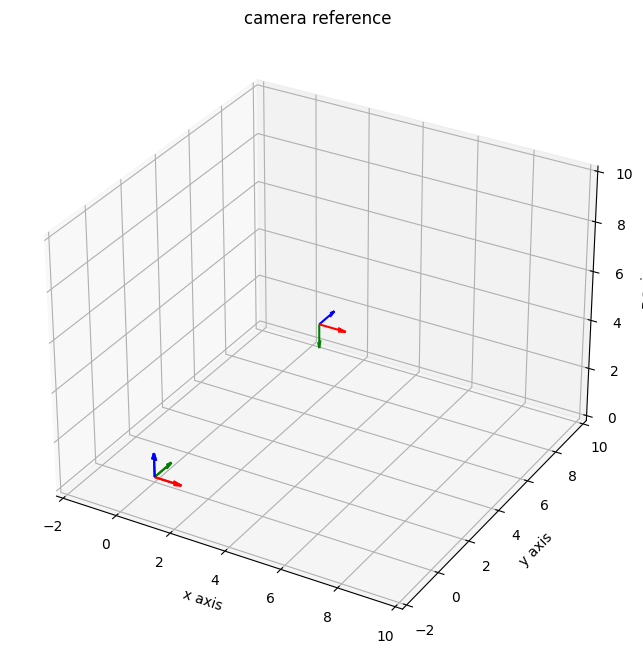

In [91]:
ax0 = set_plot(lim=[-2,10], limZ=[0,10])
draw_arrows(point,base,ax0)
draw_arrows(cam[:,-1],cam[:,0:3],ax0)

# Desenha a camera apos as Transformacoes
draw_arrows(cam2[:,-1],cam2[:,0:3],ax0)

Agora vamos incluir um objeto na cena. Vamos usar a casa que já apresentamos no material das aulas de python.

<Axes3D: title={'center': 'camera reference'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

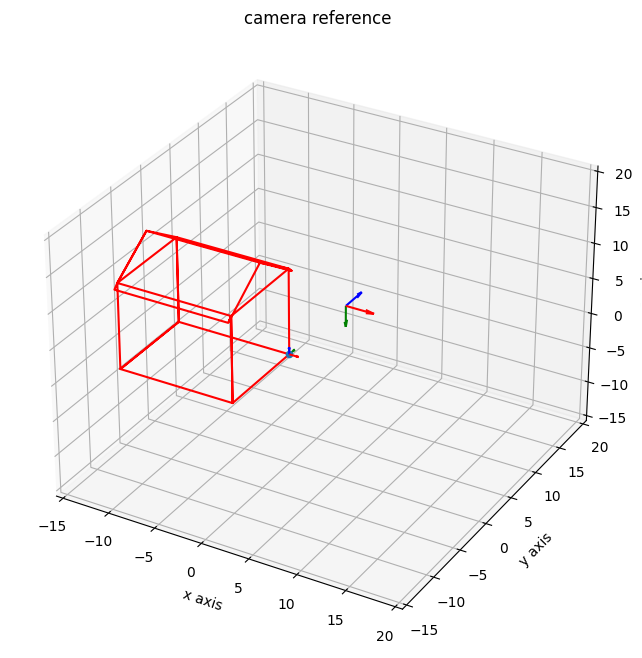

In [108]:
# Creating a house
house = np.array([  [0,           0.0,       0.     ],
                    [0,         -10.0,       0.     ],
                    [0,         -10.0,      12.     ],
                    [0,         -10.4,      11.5    ],
                    [0,            -5,      16.     ],
                    [0,             0,      12.     ],
                    [0,           0.5,      11.4    ],
                    [0,             0,      12.     ],
                    [0,             0,       0.     ],
                    [-12.,          0,       0.     ],
                    [-12.,       -5.0000,    0.     ],
                    [-12.,      -10.0000,    0.     ],
                    [0,         -10.0000,    0.     ],
                    [0,         -10.0000,   12.0000 ],
                    [-12.0000,  -10.0000,   12.0000 ],
                    [-12.0000,      0,      12.0000 ],
                    [0,             0,      12.0000 ],
                    [0,         -10.0000,   12.0000 ],
                    [0,         -10.5000,   11.4000 ],
                    [-12.0000,  -10.5000,   11.4000 ],
                    [-12.0000,  -10.0000,   12.0000 ],
                    [-12.0000,   -5.0000,   16.0000 ],
                    [0,          -5.0000,   16.0000 ],
                    [0,           0.5000,   11.4000 ],
                    [-12.0000,    0.5000,   11.4000 ],
                    [-12.0000,         0,   12.0000 ],
                    [-12.0000,   -5.0000,   16.0000 ],
                    [-12.0000,  -10.0000,   12.0000 ],
                    [-12.0000,  -10.0000,         0 ],
                    [-12.0000,   -5.0000,         0 ],
                    [-12.0000,         0,         0 ],
                    [-12.0000,         0,   12.0000 ],
                    [-12.0000,         0,         0 ]   ])

house = np.transpose(house)


# add a vector of ones to the house matrix to represent the house in homogeneous coordinates
house = np.vstack([house, np.ones(np.size(house,1))])

ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa que está em (0,0,0) para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')

arrow_lenght = 3
# Plote a câmera também - altere o código abaixo, se necessário
draw_arrows(cam2[:,-1],cam2[:,0:3],ax0, length=arrow_lenght)


Agora você deverá rotacionar a casa de -30 graus em torno do eixo Z e posicioná-la de tal forma que sua quina (0,0,0) ficará em (3, 20, 2).

Faça o seu código aqui.

In [93]:
angleDeg = -30 # angulo em graus
house = myRotateZ(house, np.deg2rad(angleDeg)) # a funcao usa angulo em radianos
house = myTranslate(house, 3, 20, 2)

Agora vamos plotar a câmera e a casa no mesmo gráfico.

3.0
20.0
2.0


<Axes3D: title={'center': 'camera reference'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

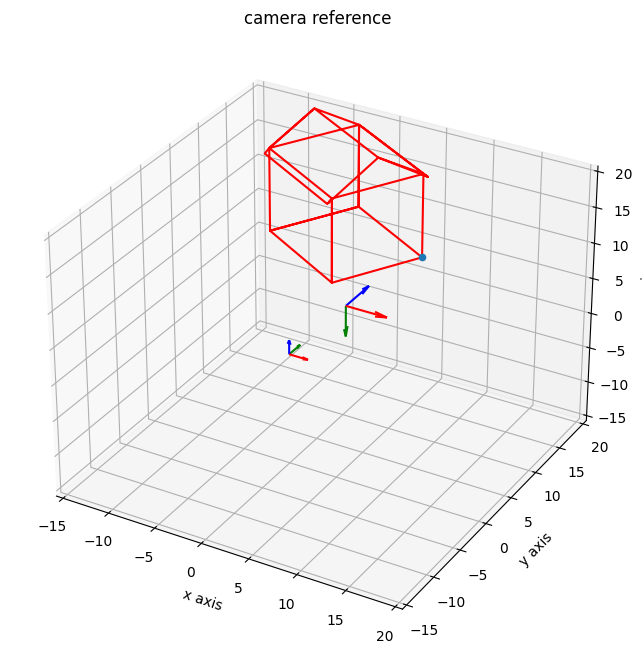

In [94]:
ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0, length = 2)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')

print(house[0,0])
print(house[1,0])
print(house[2,0])

# Plote a câmera também - altere o código abaixo, se necessário
draw_arrows(cam2[:,3],cam2[:,0:3],ax0, arrow_lenght)

Calcule qual o valor das coordenadas da quina da casa no referencial da câmera.


Lembre-se que a quina da casa está posicionada em (3, 20, 2) e que a câmera está posicionada em (2, 7, 3), ambas no referencial do mundo. Mas o referencial da câmera possui orientações diferentes do referencial do mundo. Faça o seu código logo abaixo e imprima a sua resposta usando "print".


 [[ 1.  0.  0.  2.]
 [ 0.  0.  1.  7.]
 [ 0. -1.  0.  3.]
 [ 0.  0.  0.  1.]] 

 [[  0.    0.    0.    1. ]
 [  0.  -10.    0.    1. ]
 [  0.  -10.   12.    1. ]
 [  0.  -10.4  11.5   1. ]
 [  0.   -5.   16.    1. ]
 [  0.    0.   12.    1. ]
 [  0.    0.5  11.4   1. ]
 [  0.    0.   12.    1. ]
 [  0.    0.    0.    1. ]
 [-12.    0.    0.    1. ]
 [-12.   -5.    0.    1. ]
 [-12.  -10.    0.    1. ]
 [  0.  -10.    0.    1. ]
 [  0.  -10.   12.    1. ]
 [-12.  -10.   12.    1. ]
 [-12.    0.   12.    1. ]
 [  0.    0.   12.    1. ]
 [  0.  -10.   12.    1. ]
 [  0.  -10.5  11.4   1. ]
 [-12.  -10.5  11.4   1. ]
 [-12.  -10.   12.    1. ]
 [-12.   -5.   16.    1. ]
 [  0.   -5.   16.    1. ]
 [  0.    0.5  11.4   1. ]
 [-12.    0.5  11.4   1. ]
 [-12.    0.   12.    1. ]
 [-12.   -5.   16.    1. ]
 [-12.  -10.   12.    1. ]
 [-12.  -10.    0.    1. ]
 [-12.   -5.    0.    1. ]
 [-12.    0.    0.    1. ]
 [-12.    0.   12.    1. ]
 [-12.    0.    0.    1. ]]


 [[ 1.  0.  0.  2.]
 [ 0

<Axes3D: title={'center': 'camera reference'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

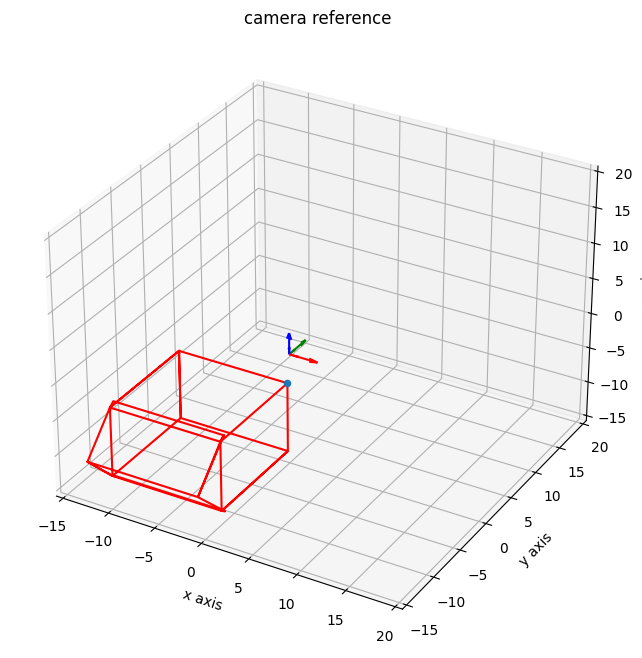

In [117]:
print('\n', cam2, '\n\n', np.transpose(house))


# Transformação acumulada para colocar o referencial da câmera onde se encontra atualmente:
T = myTranslate(myRotateX(obj=None, angle=angCam), dxCam, dyCam, dzCam)
# inclui a rotação acumulada e a translação da origem
# Essa transformação faz a conversão de coordenadas no referencial da câmera para o referencial do mundo
print('\n\n', T, '\n\n')

# Para obter as coordenadas do objeto no referencial da câmera, devemos aplicar ao objeto
# as transformações que levariam a câmera para a origem.

# Matriz que faz a transformação de Coordenada
# Referencial do Mundo -> Referencial da Câmera
Tref_world2Cam = myRotateX(myTranslate(obj=None, dx= -dxCam, dy= -dyCam, dz= -dzCam), -angCam)
print('\n\n',Tref_world2Cam, '\n\n')

house_refC = Tref_world2Cam @ house
cam3 = Tref_world2Cam @ cam2
print('\n house_refC(0,0) = (', house_refC[0,0],',', house_refC[1,0], ',', house_refC[2,0], ')')

print('\n', cam3, '\n\n', np.transpose(house_refC))

# plotar no ref da camera
ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house_refC[0,:], house_refC[1,:], house_refC[2,:], 'red')
# Plotando a quina da casa que está em (0,0,0) para servir de referência
ax0.scatter(house_refC[0,0], house_refC[1,0], house_refC[2,0],'b')

# Plote a câmera também - altere o código abaixo, se necessário
draw_arrows(cam3[:,-1],cam3[:,0:3],ax0, length = arrow_lenght)


Imagine agora que você deverá rotacionar a sua câmera em torno do seu eixo Y (que está na vertical) de 45 graus e depois incliná-la de -15 graus em torno do eixo X (que está na horizontal), mas sem tirá-la da posição onde ela se encontra.
Faça seu código abaixo.

In [96]:
# Dica: Faça uma rotação de cada vez e plote o resultado em cada caso para você ter certeza de que está correto



Vamos agora plotar o seu resultado.

<Axes3D: title={'center': 'camera reference'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

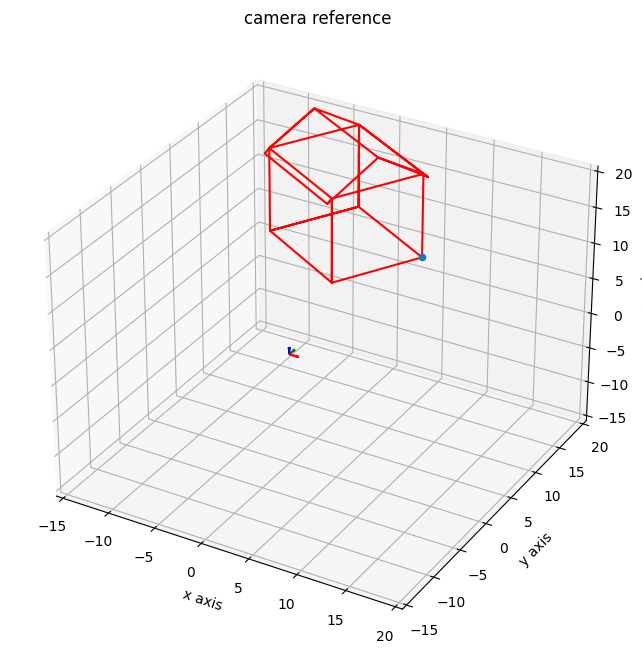

In [97]:
ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa que está em (0,0,0) para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')

# Plote a câmera também - altere o código abaixo, se necessário
draw_arrows(cam[:,-1],cam[:,0:3],ax0)


Calcule novamente qual o valor das coordenadas da quina da casa no referencial da câmera. Lembre-se que a quina da casa está posicionada em (3, 20, 2) e que a câmera está posicionada em (2, 7, 3), ambas no referencial do mundo. Mas o referencial da câmera possui orientações diferentes do referencial do mundo. Faça o seu código logo abaixo e imprima a sua resposta usando "print".

In [98]:
# Transformação acumulada para colocar o referencial da câmera onde se encontra atualmente:
# inclui a rotação acumulada e a translação da origem
# Essa transformação faz a conversão de coordenadas no referencial da câmera para o referencial do mundo



Vamos agora transladar a câmera de 5 unidades na direção de seu eixo Z. Faça o seu código abaixo.

In [99]:
# Lembre-se que é preciso levar a câmera para a origem antes de realizar a
# transformação que ocorrerá no próprio eixo da câmera


Vamos plotar mais uma vez a casa e a câmera em sua nova postura (posição e orientação). Para comparação, plote também a postura anterior da câmera.

<Axes3D: title={'center': 'camera reference'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

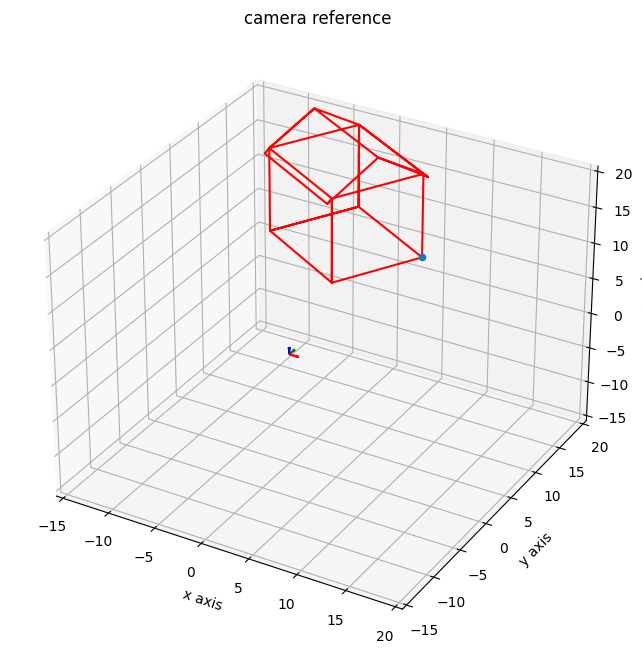

In [100]:
ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')

# Plote a câmera também - altere o código abaixo, se necessário
draw_arrows(cam[:,-1],cam[:,0:3],ax0)

Por fim, vamos transladar a câmera no referencial do mundo de -10 unidades no eixo Z. Faça seu código abaixo.

E plotar mais uma vez o seu resultado, mostrando a casa, o referencial original e a câmera em sua nova postura (posição e orientação). Para comparação, plote também a postura anterior da câmera.

<Axes3D: title={'center': 'camera reference'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

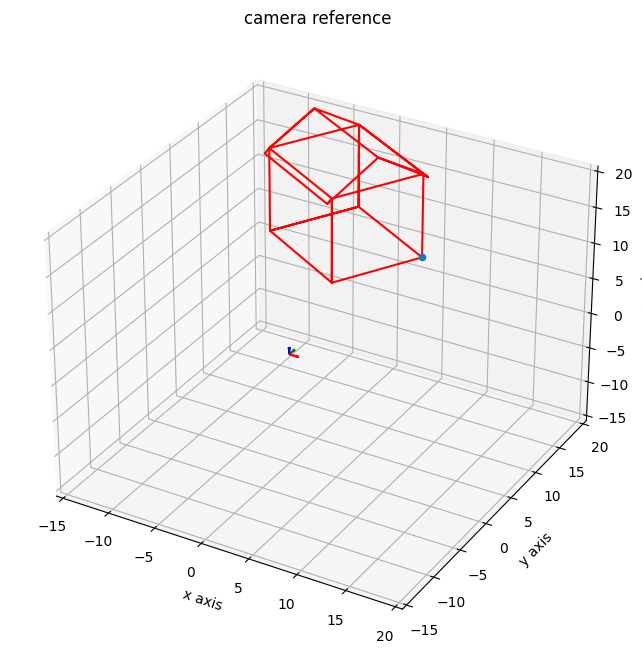

In [101]:
ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')

# Plote a câmera também - altere o código abaixo, se necessário
draw_arrows(cam[:,-1],cam[:,0:3],ax0)